In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from scipy import stats as stats
from sklearn.model_selection import train_test_split
import statsmodels
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.head()

In [7]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
housing_df.drop_duplicates(subset='id',keep='first',inplace=True)
housing_df.info()

In [39]:
housing_df.price.describe()

count    2.142000e+04
mean     5.407393e+05
std      3.679311e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [40]:
housing_df.sqft_living.describe()

count    21420.000000
mean      2083.132633
std        918.808412
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [9]:
housing_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


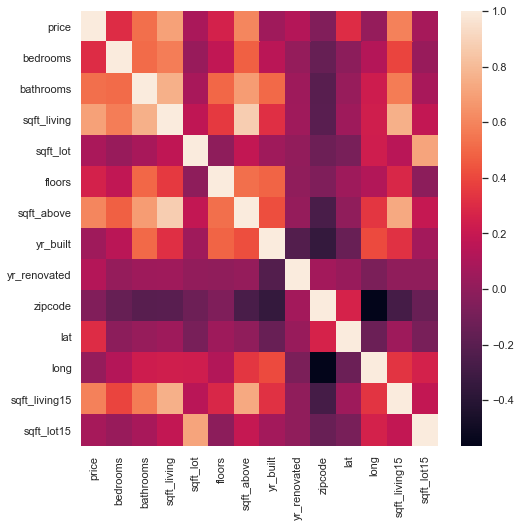

In [10]:
sns.set(rc={'figure.figsize':(8, 8)})

sns.heatmap(housing_df.corr());

In [66]:
y = housing_df.price
X = housing_df[['sqft_living']]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=None,
                                                    random_state=42)

In [67]:
display(X_train.head())
display(X_test.head())

,sqft_living
19689,840
14928,1930
3885,3120
183,1050
11921,1800


,sqft_living
6132,1020
8993,1620
559,2050
11931,2510
15176,1390


In [5]:
formula = 'price ~ sqft_living'

mod = ols(formula=formula, data=housing_df).fit()
mod_summ = mod.summary()
print(mod_summ)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:12:36   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      

In [55]:
housing_df = pd.concat([X_train, y_train], axis=1)

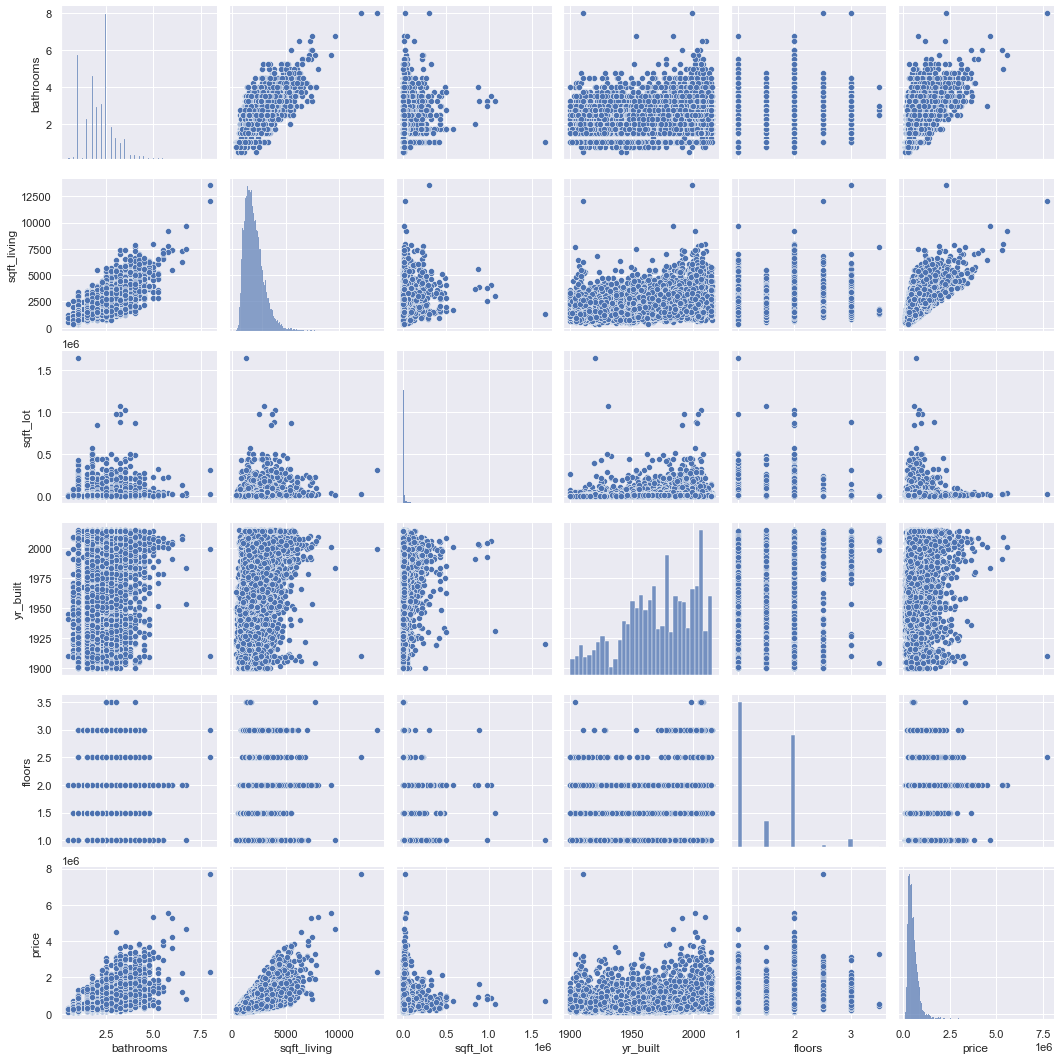

In [56]:
sns.pairplot(housing_df)
plt.show()

In [28]:
king_df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [58]:
y = king_df.price
X = king_df[['bathrooms', 'bedrooms', 'sqft_lot', 'floors', 'sqft_living']]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=None,
                                                    random_state=42
)

In [59]:
display(X_train.head())
display(X_test.head())

,bathrooms,bedrooms,sqft_lot,floors,sqft_living
id,,,,,
3905080280,2.50,3,4499,2.0,1880
5466420030,2.50,3,6564,1.0,2020
2623069010,4.00,5,493534,2.0,4720
4443800545,2.00,2,3880,1.0,1430
9485930120,2.25,3,32112,1.0,2270


,bathrooms,bedrooms,sqft_lot,floors,sqft_living
id,,,,,
6303401050,0.75,3,8573,1.0,850
1995200200,1.00,3,6083,1.0,1510
1423089118,2.25,4,42000,1.0,1790
9349900110,1.50,2,2500,1.0,1140
455000395,1.00,3,3920,1.0,1500


In [60]:
print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0] == y_test.shape[0])

(16197, 5)
(5400, 5)
True
True


In [61]:
lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
lr.score(X_train, y_train)

0.5075369084936474

In [69]:
ohe = OneHotEncoder()
ohe.fit_transform(X_train)

<16065x897 sparse matrix of type '<class 'numpy.float64'>'
	with 16065 stored elements in Compressed Sparse Row format>

In [71]:
np.random.seed(42)

y = king_df.price
X = king_df[['bedrooms', 'sqft_living', 'bathrooms', 'sqft_lot', 'floors']]

# Train test split with random_state=42 and test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Scale appropriately on TRAINING DATA 

ss = StandardScaler()
ss.fit(X_train)
X_preds_st_scaled = ss.transform(X_train)

lr = LinearRegression()

# fit and score the model (checkout the test set if there is time)
lr.fit(X_preds_st_scaled, y_train)
lr.coef_
lr.score(X_preds_st_scaled, y_train)

0.5106469795956299

In [49]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_train, y_train)

0.0

In [ ]:
plt.figure(figsize=(10,7))
x = df['price']
y = df['sqft_living']
sns.barplot(x,y)
plt.title('House Condition and price', fontsize=15, fontname='silom');